# Electronegativity

In [1]:
from mendeleev import get_table, element

In [2]:
ptable = get_table('elements')

In [3]:
ptable.columns

Index(['annotation', 'atomic_number', 'atomic_radius', 'atomic_volume',
       'block', 'boiling_point', 'density', 'description',
       'dipole_polarizability', 'electron_affinity',
       'electronic_configuration', 'evaporation_heat', 'fusion_heat',
       'group_id', 'lattice_constant', 'lattice_structure', 'melting_point',
       'name', 'period', 'series_id', 'specific_heat', 'symbol',
       'thermal_conductivity', 'vdw_radius', 'covalent_radius_cordero',
       'covalent_radius_pyykko', 'en_pauling', 'en_allen', 'jmol_color',
       'cpk_color', 'proton_affinity', 'gas_basicity', 'heat_of_formation',
       'c6', 'covalent_radius_bragg', 'covalent_radius_slater',
       'vdw_radius_bondi', 'vdw_radius_truhlar', 'vdw_radius_rt',
       'vdw_radius_batsanov', 'vdw_radius_dreiding', 'vdw_radius_uff',
       'vdw_radius_mm3', 'abundance_crust', 'abundance_sea', 'molcas_gv_color',
       'en_ghosh', 'vdw_radius_alvarez', 'c6_gb', 'atomic_weight',
       'atomic_weight_uncertainty',

In [4]:
elements = element(ptable['symbol'].values.tolist())

In [5]:
ptable['en_allred-rochow'] = [e.electronegativity('allred-rochow') for e in elements]

In [6]:
ptable['en_cottrell-sutton'] = [e.electronegativity('cottrell-sutton') for e in elements]

In [7]:
ptable['en_gordy'] = [e.electronegativity('gordy') for e in elements]

In [8]:
ptable['en_nagle'] = [e.electronegativity('nagle') for e in elements]

In [9]:
ptable['en_sanderson'] = [e.electronegativity('sanderson') for e in elements]

In [10]:
ptable['en_mulliken'] = [element(row.symbol).en_mulliken() for i, row in ptable.iterrows()]

In [11]:
ptable['en_martynov_batsanov'] = [element(row.symbol).en_martynov_batsanov() for i, row in ptable.iterrows()]

In [12]:
ens = ['atomic_number', 'symbol', 'block'] + [v for v in ptable.columns.values if v.startswith('en_')]

In [13]:
from sklearn import preprocessing

ModuleNotFoundError: No module named 'sklearn'

In [14]:
scaler = preprocessing.MinMaxScaler()

In [15]:
df = ptable[['atomic_number', 'symbol', 'block']].copy()

cols = [v for v in ptable.columns.values if v.startswith('en_')]

for col in cols:
    mask = ptable[col].notnull()
    df.loc[mask, col] = scaler.fit_transform(ptable[col].dropna().values.reshape(-1, 1))

In [16]:
df

atomic_number symbol block  en_pauling  en_allen  en_ghosh  \
0                1      H     s    0.457317  0.397837  0.496593   
1                2     He     s         NaN  0.847616  1.000000   
2                3     Li     s    0.085366  0.061199  0.050036   
3                4     Be     s    0.265244  0.222227  0.162284   
4                5      B     p    0.408537  0.337211  0.274551   
5                6      C     p    0.564024  0.456825  0.386790   
6                7      N     p    0.713415  0.582992  0.499772   
7                8      O     p    0.835366  0.715304  0.611322   
8                9      F     p    1.000000  0.856218  0.723499   
9               10     Ne     p         NaN  1.000000  0.835899   
10              11     Na     s    0.070122  0.050877  0.016612   
11              12     Mg     s    0.185976  0.153531  0.096606   
12              13     Al     p    0.277439  0.231075  0.176611   
13              14     Si     p    0.365854  0.304440  0.256591   
14              15      P     p    0.454268  0.386367  0.336579   
15              16      S     p    0.573171  0.467475  0.418259   
16              17     Cl     p    0.750000  0.535474  0.496601   
17              18     Ar     p         NaN  0.625594  0.576502   
18              19      K     s    0.036585  0.018106  0.030612   
19              20     Ca     s    0.091463  0.090734  0.079071   
20              21     Sc     d    0.201220  0.128789  0.090245   
21              22     Ti     d    0.256098  0.174996  0.101445   
22              23      V     d    0.283537  0.211576  0.112617   
23              24     Cr     d    0.292683  0.240537  0.123790   
24              25     Mn     d    0.259146  0.263887  0.134986   
25              26     Fe     d    0.344512  0.276176  0.146153   
26              27     Co     d    0.359756  0.285188  0.157361   
27              28     Ni     d    0.368902  0.296248  0.168533   
28              29     Cu     d    0.365854  0.289284  0.179688   
29              30     Zn     d    0.289634  0.225176  0.190888   
..             ...    ...   ...         ...       ...       ...   
88              89     Ac     f    0.121951       NaN  0.036635   
89              90     Th     f    0.182927       NaN  0.043500   
90              91     Pa     f    0.243902       NaN  0.096173   
91              92      U     f    0.304878       NaN  0.125942   
92              93     Np     f    0.182927       NaN  0.155711   
93              94     Pu     f    0.182927       NaN  0.208384   
94              95     Am     f         NaN       NaN  0.238125   
95              96     Cm     f         NaN       NaN  0.245018   
96              97     Bk     f         NaN       NaN  0.297804   
97              98     Cf     f         NaN       NaN  0.327460   
98              99     Es     f         NaN       NaN  0.357229   
99             100     Fm     f         NaN       NaN  0.386998   
100            101     Md     f         NaN       NaN  0.416739   
101            102     No     f         NaN       NaN  0.446508   
102            103     Lr     d         NaN       NaN  0.453374   
103            104     Rf     d         NaN       NaN       NaN   
104            105     Db     d         NaN       NaN       NaN   
105            106     Sg     d         NaN       NaN       NaN   
106            107     Bh     d         NaN       NaN       NaN   
107            108     Hs     d         NaN       NaN       NaN   
108            109     Mt     d         NaN       NaN       NaN   
109            110     Ds     d         NaN       NaN       NaN   
110            111     Rg     d         NaN       NaN       NaN   
111            112     Cn     d         NaN       NaN       NaN   
112            113     Nh     p         NaN       NaN       NaN   
113            114     Fl     p         NaN       NaN       NaN   
114            115     Mc     p         NaN       NaN       NaN   
115            116     Lv     p         NaN       Na

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

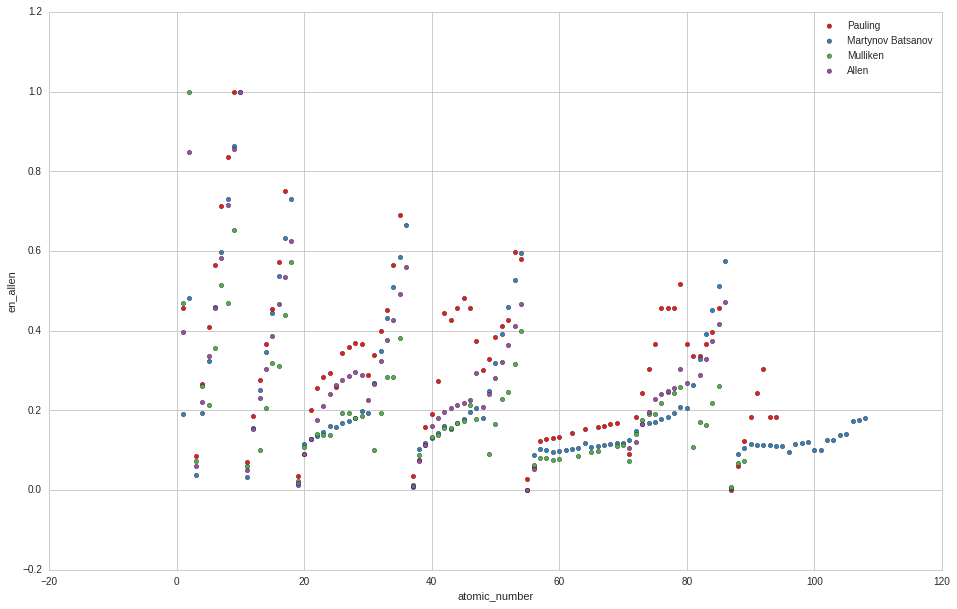

In [36]:
sns.set_style('whitegrid')
colpal = sns.color_palette('Set1', 10)
ax = df.plot(x='atomic_number', y='en_pauling', kind='scatter', label='Pauling', color=colpal[0], figsize=(16, 10))
df.plot(x='atomic_number', y='en_martynov_batsanov', kind='scatter', color=colpal[1], label='Martynov Batsanov', ax=ax)
df.plot(x='atomic_number', y='en_mulliken', kind='scatter', color=colpal[2], label='Mulliken', ax=ax)
df.plot(x='atomic_number', y='en_allen', kind='scatter', color=colpal[3], label='Allen', ax=ax)

In [15]:
from bokeh.io import output_notebook

In [16]:
output_notebook()

BokehJS successfully loaded.

In [17]:
from mendeleev import periodic_plot

In [19]:
periodic_plot(ptable, values='en_martynov_batsanov', title='Martynov and Batsanov EN', decimals=2)

In [38]:
periodic_plot(ptable, values='en_pauling', title='Pauling Electronegativity', decimals=2)

In [39]:
periodic_plot(ptable, values='en_allen', title='Allen Electronegativity', decimals=2)

In [40]:
periodic_plot(ptable, values='en_mulliken', title='Mulliken Electronegativity', decimals=2)

In [93]:
#ptable['en_nagle-scaled'] = scaler.fit_transform(ptable['en_nagle'].values.reshape(-1, 1))
periodic_plot(ptable, values='en_nagle', title='Nagle Electronegativity', decimals=2)#, cmap='viridis')

In [89]:
periodic_plot(ptable, values='en_allred-rochow-scaled', title='Allred-Rochow Electronegativity', decimals=2, cmap='viridis')

In [43]:
ptable['en_allred-rochow'].isnull().sum()

0

In [46]:
ptable['en_cottrell-sutton'].isnull().sum()

0

In [47]:
ptable['en_gordy'].isnull().sum()

0

In [48]:
ptable['en_sanderson'].isnull().sum()

0

In [50]:
ptable[ens].isnull().sum()

atomic_number         0
symbol                0
en_pauling           33
en_allen             47
en_allred-rochow      0
en_cottell-sutton     0
en_gordy              0
en_nagle             12
en_sanderson          0
en_mulliken          42
dtype: int64

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/lmentel/.virtualenvs/cat/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


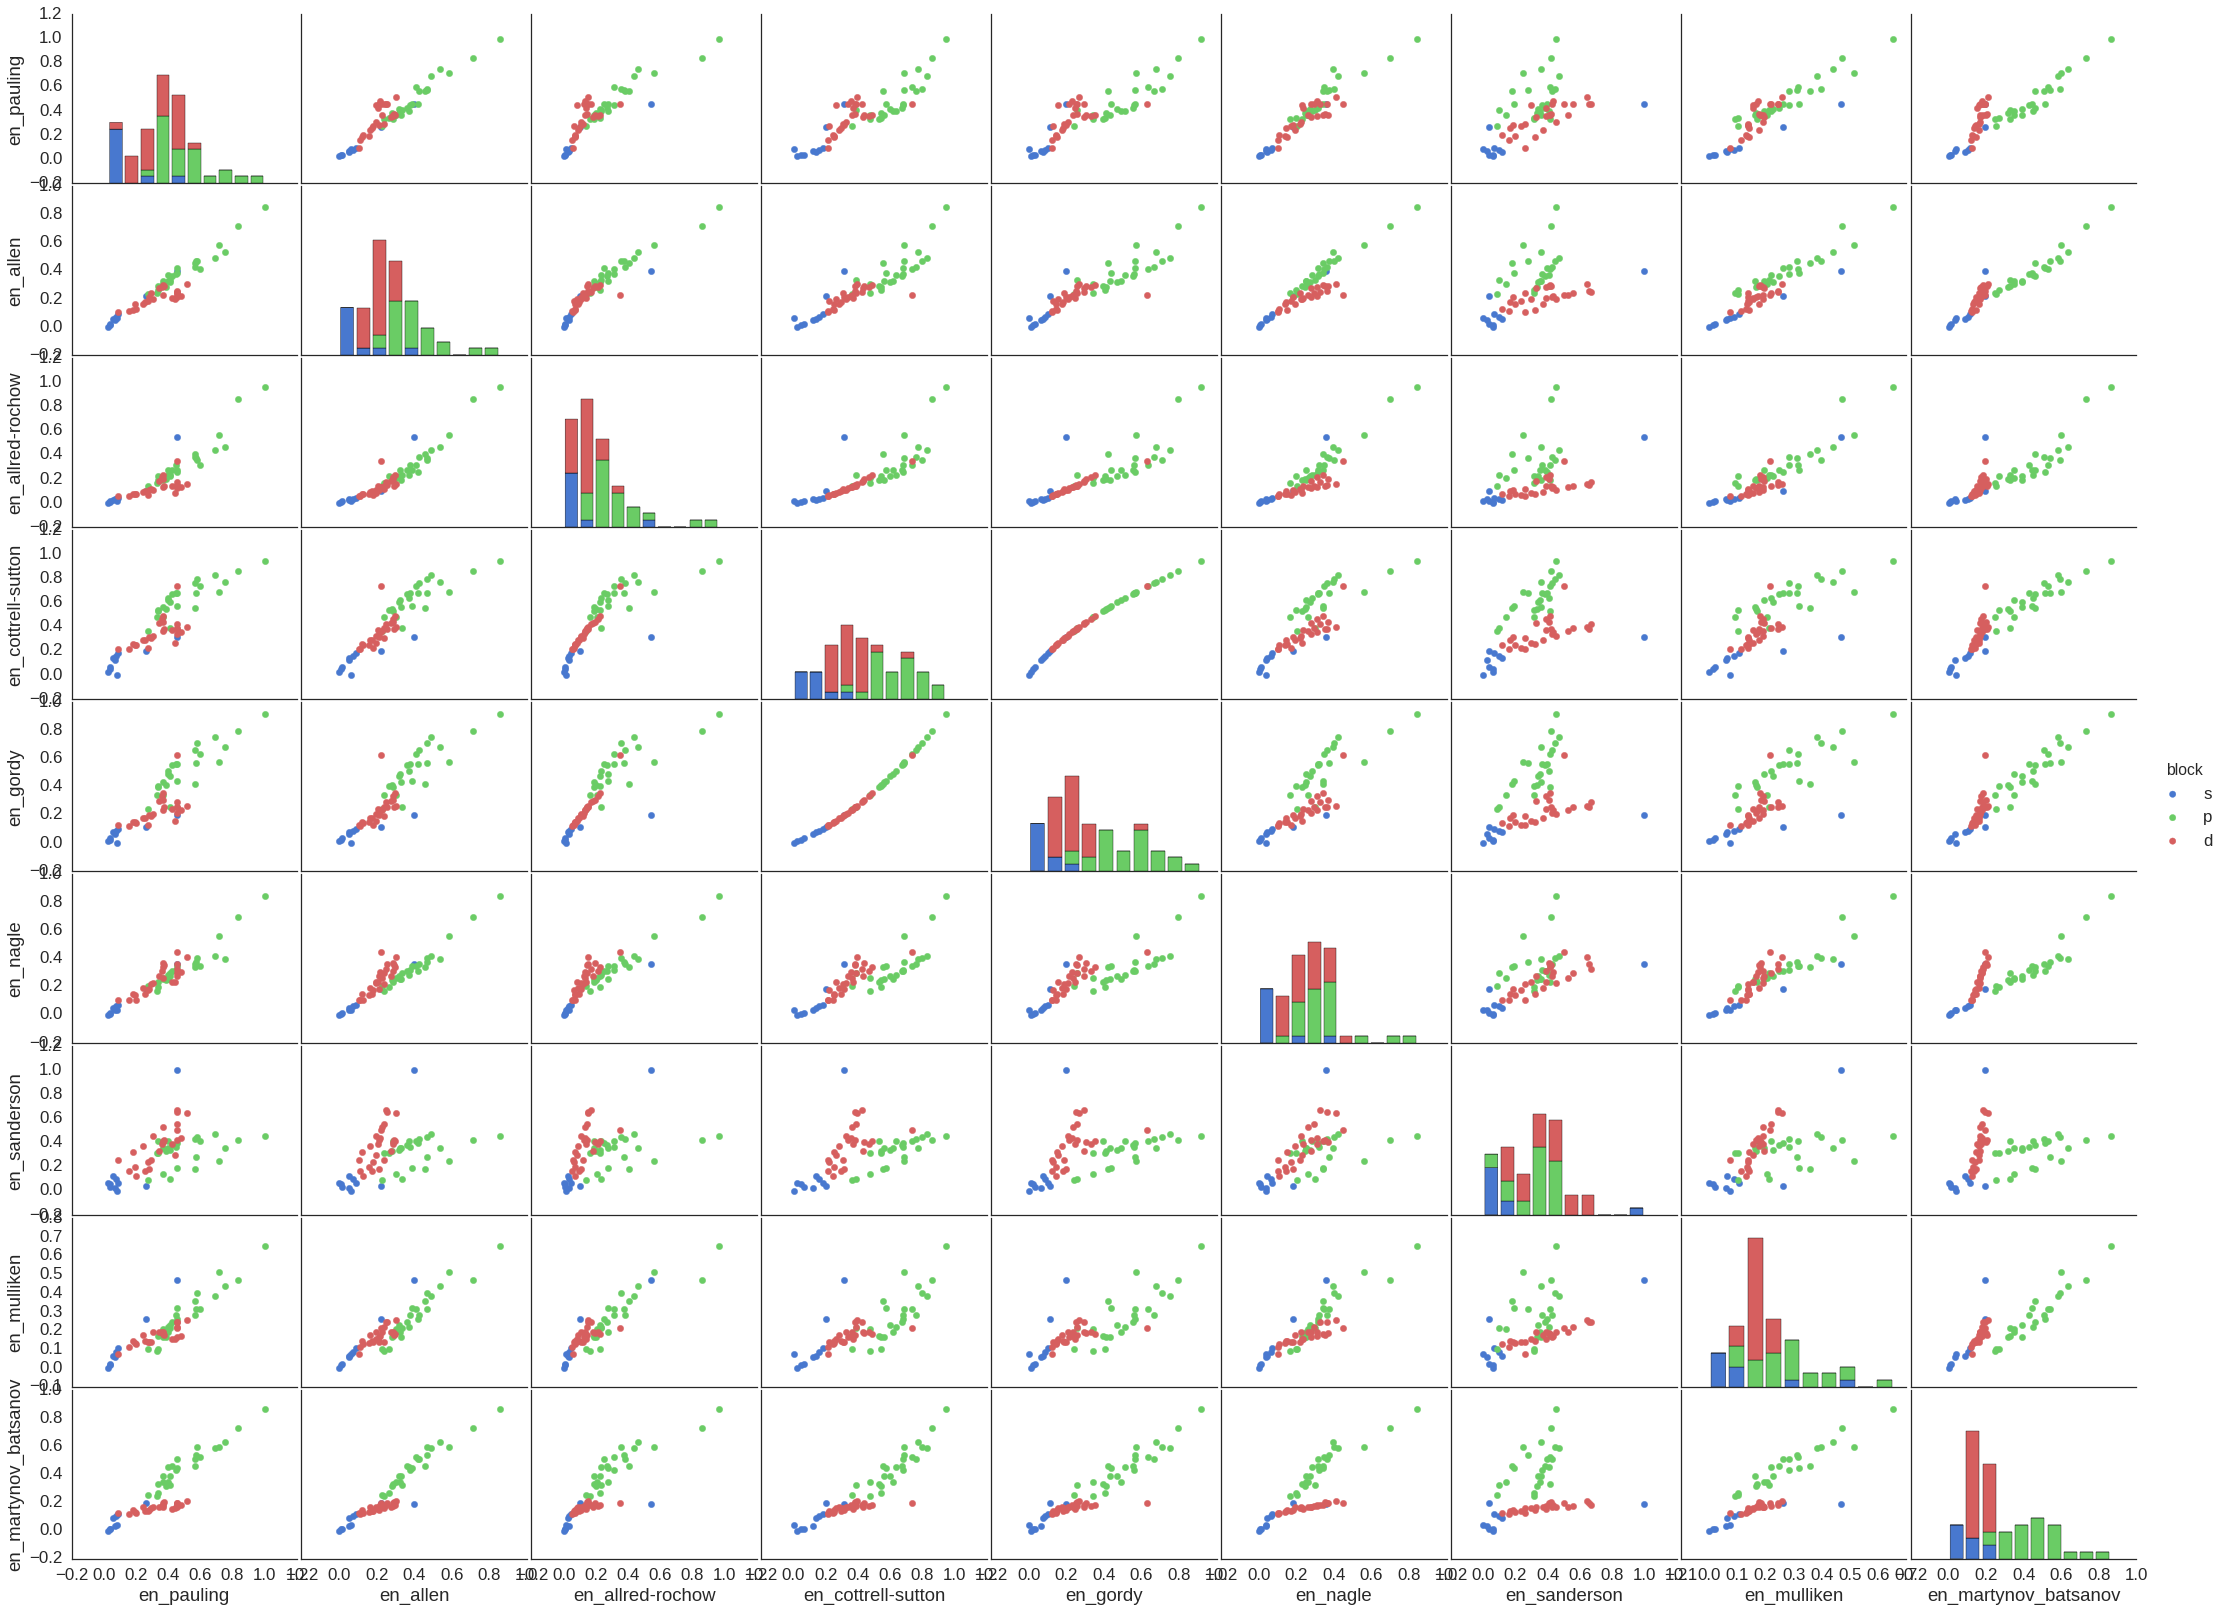

In [38]:
sns.set(context='talk',style='white', palette='muted', font_scale=1.3,rc={"figure.figsize": (16, 12)})
keys = ['symbol', 'block'] + [v for v in ptable.columns.values if v.startswith('en_')]
#plt.figure(figsize=(10, 10))
g = sns.PairGrid(df[keys].dropna(), hue='block', aspect=1.33, dropna=True)
g.fig.subplots_adjust(wspace=.02, hspace=.02)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, s=40)
g.add_legend()

In [57]:
ptable[keys].describe()

en_pauling   en_allen  en_allred-rochow  en_cottell-sutton    en_gordy  \
count   85.000000  71.000000        118.000000         118.000000  118.000000   
mean     1.748588  11.266014          0.000238           0.161568    0.028114   
std      0.634442   4.761244          0.000214           0.045027    0.016127   
min      0.700000   3.898000          0.000034           0.084515    0.007143   
25%      1.240000   8.690000          0.000091           0.123185    0.015175   
50%      1.700000  10.390000          0.000189           0.154260    0.023800   
75%      2.160000  13.205000          0.000286           0.191797    0.036786   
max      3.980000  28.310000          0.001225           0.286513    0.082090   

         en_nagle  en_sanderson  en_mulliken  en_cottrell-sutton  
count  106.000000    118.000000    76.000000          118.000000  
mean     0.437329      0.769901     4.038759            0.161568  
std      0.240079      0.402952     1.655477            0.045027  
min      0.135608      0.048868     1.946953            0.084515  
25%      0.232811      0.510473     2.987044            0.123185  
50%      0.413543      0.721787     3.694295            0.154260  
75%      0.575022      0.963918     4.488840            0.191797  
max      1.441649      2.187771    12.293694            0.286513

In [58]:
ptable[keys].corr()

en_pauling  en_allen  en_allred-rochow  en_cottell-sutton  \
en_pauling            1.000000  0.940560          0.890228           0.892989   
en_allen              0.940560  1.000000          0.942748           0.846593   
en_allred-rochow      0.890228  0.942748          1.000000           0.846370   
en_cottell-sutton     0.892989  0.846593          0.846370           1.000000   
en_gordy              0.887645  0.856248          0.875230           0.990314   
en_nagle              0.924650  0.932416          0.915106           0.848868   
en_sanderson          0.603775  0.440857          0.361665           0.444030   
en_mulliken           0.913937  0.920798          0.856285           0.677514   
en_cottrell-sutton    0.892989  0.846593          0.846370           1.000000   

                    en_gordy  en_nagle  en_sanderson  en_mulliken  \
en_pauling          0.887645  0.924650      0.603775     0.913937   
en_allen            0.856248  0.932416      0.440857     0.920798   
en_allred-rochow    0.875230  0.915106      0.361665     0.856285   
en_cottell-sutton   0.990314  0.848868      0.444030     0.677514   
en_gordy            1.000000  0.845934      0.389857     0.679840   
en_nagle            0.845934  1.000000      0.584607     0.900094   
en_sanderson        0.389857  0.584607      1.000000     0.496372   
en_mulliken         0.679840  0.900094      0.496372     1.000000   
en_cottrell-sutton  0.990314  0.848868      0.444030     0.677514   

                    en_cottrell-sutton  
en_pauling                    0.892989  
en_allen                      0.846593  
en_allred-rochow              0.846370  
en_cottell-sutton             1.000000  
en_gordy                      0.990314  
en_nagle                      0.848868  
en_sanderson                  0.444030  
en_mulliken                   0.677514  
en_cottrell-sutton            1.000000

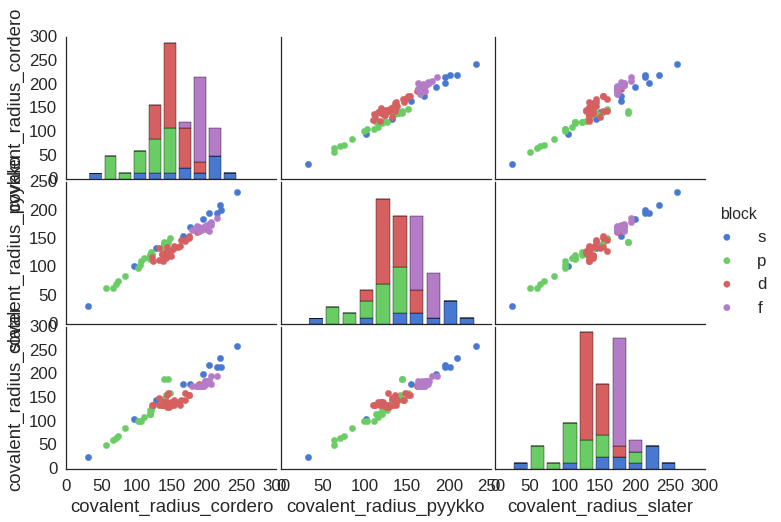

In [73]:
sns.set(context='talk',style='white', palette='muted', font_scale=1.3,rc={"figure.figsize": (16, 12)})
keys = ['symbol', 'block'] + ['covalent_radius_cordero', 'covalent_radius_pyykko', 'covalent_radius_slater']
plt.figure(figsize=(10, 10))
g = sns.PairGrid(ptable[keys].dropna(), hue='block', aspect=1.33, dropna=True)
g.fig.subplots_adjust(wspace=.02, hspace=.02)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, s=40)
g.add_legend()

In [72]:
[v for v in ptable.columns.values if v.startswith('covalent_radius')]

['covalent_radius_cordero',
 'covalent_radius_pyykko',
 'covalent_radius_bragg',
 'covalent_radius_slater']

In [94]:
periodic_plot(ptable, values='c6', title='C6', cmap='viridis')

In [97]:
(528.0 + 185.0)/2

356.5

In [61]:
periodic_plot(ptable, values='dipole_polarizability', title='Dipole polarizability', cmap='viridis')

TypeError: super(type, obj): obj must be an instance or subtype of type

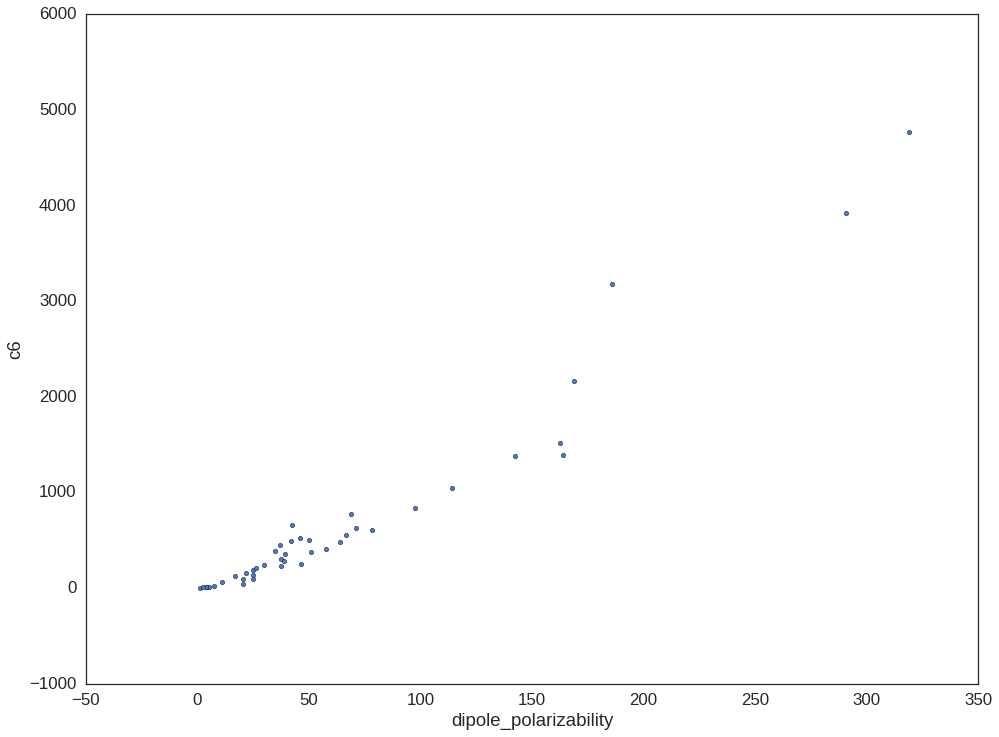

In [95]:
ptable.plot(x='dipole_polarizability', y='c6', kind='scatter')

In [39]:
from scipy import stats

In [44]:
x = ptable[['en_pauling', 'en_allred-rochow']].dropna().values

In [47]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x[:, 1], x[:, 0])

In [49]:
print slope, intercept, r_value**2

2764.87216981 1.09290289634 0.79250632695


In [56]:
mask = ptable['en_allred-rochow'].notnull()
xpu = slope*x[:, 1] + intercept
ptable['en_allred-rochow-pu'] = slope*ptable['en_allred-rochow'] + intercept

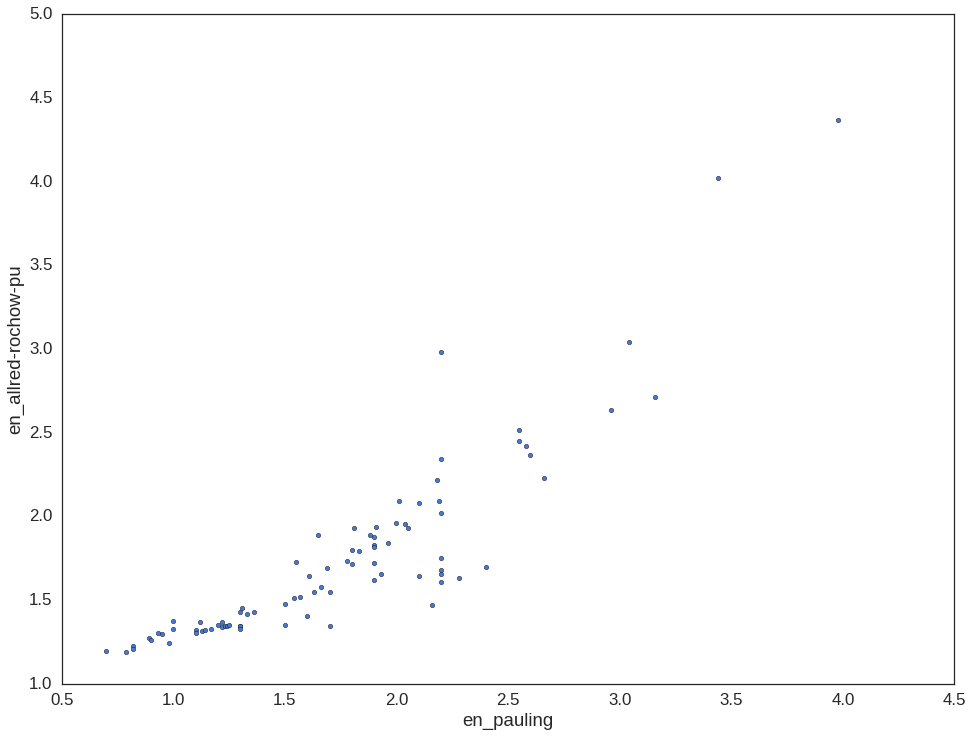

In [57]:
ptable.plot(x='en_pauling', y='en_allred-rochow-pu', kind='scatter')

In [60]:
periodic_plot(ptable, values='density', title='Density', decimals=2)

TypeError: super(type, obj): obj must be an instance or subtype of type